In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_minst = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_minst.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss is low ==> Cancelling Training!!")
      self.model.stop_training = True

In [94]:
model = keras.Sequential([
  keras.layers.Conv2D(64,(3,3),activation = tf.nn.relu, input_shape=(28,28,1)),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64,(3,3),activation = tf.nn.relu, input_shape=(28,28,1)),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(128,activation = tf.nn.relu),
  keras.layers.Dense(10,activation = tf.nn.softmax),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [95]:
callbacks = myCallback()
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy')
model.fit(train_images,train_labels,epochs = 5)
test_loss = model.evaluate(test_images,test_labels)
print(test_loss)

Epoch 1/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4370
Epoch 2/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2941
Epoch 3/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2501
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2166
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.2657
0.2656647562980652


In [96]:
test_loss

0.2656647562980652

#**To See the Transformation of images through each layer**

In [97]:
for i in range(31):
  print(str(i)+':'+str(test_labels[i])+' , ',end='') 
  if i!= 0 and i%10 == 0:
    print()

0:9 , 1:2 , 2:1 , 3:1 , 4:6 , 5:1 , 6:4 , 7:6 , 8:5 , 9:7 , 10:4 , 
11:5 , 12:7 , 13:3 , 14:4 , 15:1 , 16:2 , 17:4 , 18:8 , 19:0 , 20:2 , 
21:5 , 22:7 , 23:9 , 24:1 , 25:4 , 26:6 , 27:0 , 28:9 , 29:3 , 30:8 , 


```
def f():
  return dict(foo=1, bar=2, baz=3)
  
f()
{'foo': 1, 'bar': 2, 'baz': 3}

f()['baz']
3
```

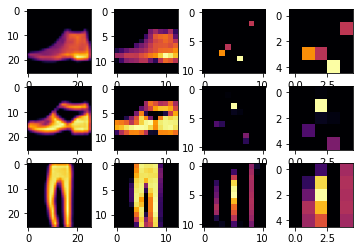

In [98]:
import matplotlib.pyplot as plt
_,axarr = plt.subplots(3,4)
First_Image = 0
Second_Image = 23
Third_Image = 2
Convolution_Number = 4
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[First_Image].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0, : , : ,Convolution_Number], cmap = 'inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[Second_Image].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, : , : ,Convolution_Number], cmap = 'inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[Third_Image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , : ,Convolution_Number], cmap = 'inferno')
  axarr[2,x].grid(False)

# >Experiment with filters and pools<

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
i = misc.ascent()#Returns a image

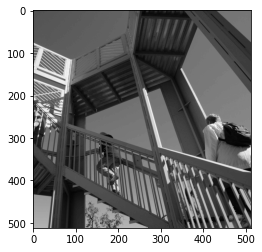

In [109]:
plt.grid(False)
plt.gray()
plt.axis('on')
plt.imshow(i)
plt.show()

In [110]:
i_trans = np.copy(i)
size_x = i_trans.shape[0]
size_y = i_trans.shape[1]
print(str(size_x)+','+str(size_y))

512,512


In [0]:
filter = [[0,1,0],[1,-4,1],[0,1,0]]#tp
#filter = [[-1,-2,-1],[0,0,0],[1,2,1]]#vertical
#filter = [[-1,0,1],[-2,0,2],[-1,0,1]]#horizontal
filter = [[0,1,5],[1,-4,1],[0,1,-5]]#tp
weight = 1

In [0]:
#convolution for 3x3 array
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution += (i[x-1,y-1] * filter[0][0])
    convolution += (i[x,y-1] * filter[0][1])
    convolution += (i[x+1,y-1] * filter[0][2])
    convolution += (i[x-1,y] * filter[1][0])
    convolution += (i[x,y] * filter[1][1])
    convolution += (i[x+1,y] * filter[1][2])
    convolution += (i[x+1,y+1] * filter[2][0])
    convolution += (i[x-1,y+1] * filter[2][1])
    convolution += (i[x+1,y+1] * filter[2][2])
    convolution += weight
    if(convolution<0):
      convolution = 0
    if(convolution>255):
      convolution = 255
    i_trans[x,y] = convolution

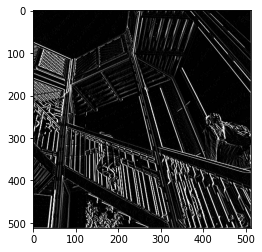

In [153]:
plt.grid(False)
plt.gray()
plt.axis('on')
plt.imshow(i_trans)
plt.show()

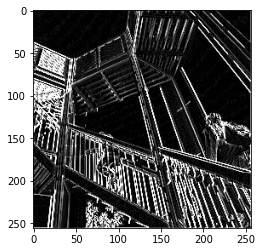

In [154]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImg =  np.zeros((new_x,new_y))
for x in range(0,size_x, 2):
  for y in range(0,size_y, 2):
    pixels = []
    pixels.append(i_trans[x,y])
    pixels.append(i_trans[x+1,y])
    pixels.append(i_trans[x,y+1])
    pixels.append(i_trans[x+1,y+1])
    pixels.sort(reverse = True)
    newImg[int(x/2),int(y/2)] = pixels[0]

plt.grid(False)
plt.gray()
plt.axis('on')
plt.imshow(newImg)
plt.show()
    

# Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"

In [0]:
# GRADED FUNCTION: train_mnist_conv
def train_mnist_conv():
    # Please write your code only where you are indicated.
    # please do not remove model fitting inline comments.

    # YOUR CODE STARTS HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs = {}):
            if(logs.get('acc')>0.998):
                print('\nReached 99.8% accuracy so cancelling training!')
                self.model.stop_training = True
    callbacks = myCallback()
    # YOUR CODE ENDS HERE

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    # YOUR CODE STARTS HERE
    training_images = training_images.reshape(60000,28,28,1)
    test_images = test_images.reshape(10000,28,28,1)
    training_images = training_images / 255.0
    test_images = test_images / 255.0
    # YOUR CODE ENDS HERE

    model = tf.keras.models.Sequential([
            # YOUR CODE STARTS HERE
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128,activation = tf.nn.relu),
            tf.keras.layers.Dense(10,activation = tf.nn.softmax)
            # YOUR CODE ENDS HERE
    ])
    #model.summary()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
    history = model.fit(
        # YOUR CODE STARTS HERE
        training_images,
        training_labels,
        epochs = 20,
        callbacks=[callbacks]
        # YOUR CODE ENDS HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]



In [163]:
_, _ = train_mnist_conv()

Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.9587

TypeError: ignored

In [0]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();
%%javascript


IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);